# Project - Analysis of telecom compant datasets  

## Project Description  

We work as an analysts for the telecom operator Megaline. The company
offers its clients two prepaid plans, Surf and Ultimate. 
The commercial department wants to know which of the plans brings in more revenue in order
to adjust the advertising budget.

We are going to carry out a preliminary analysis of the plans based on a
relatively small client selection. You'll have the data on 500 Megaline clients:
who the clients are, where they're from, which plan they use, and the number
of calls they made and text messages they sent in 2018. Our job is to analyze
clients' behavior and determine which prepaid plan brings in more revenue.

**datasets:**
1. megaline_calls.csv [Download dataset](https://code.s3.yandex.net/datasets/megaline_calls.csv)  
2. megaline_internet.csv [Download dataset](https://code.s3.yandex.net/datasets/megaline_internet.csv)
3. megaline_messages.csv [Download dataset](https://code.s3.yandex.net/datasets/megaline_messages.csv)
4. /datasets/megaline_plans.csv [Download dataset](https://code.s3.yandex.net/datasets/megaline_plans.csv)
5. /datasets/megaline_users.csv [Download dataset](https://code.s3.yandex.net/datasets/megaline_users.csv)

## Part 1 - Open the data file and study the general information

**Import Packages:**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from scipy import stats as st
import math

In [4]:
# functions area:
def check_dataset(df):
    # print dataset info:
    print('1. Info:')
    df.info()
    
    # display the table
    print('\n'+'2. Display table:')
    display(df.head())
    
    # Check the missing data propotion:
    print('\n'+'3. Check missing values:\n') 
    report = df.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
    report.sort_values(by = 'missing_values', ascending = False)
    print(report,'\n')
    
    # Check duplicates
    print('\n'+'4. Check duplicates:')
    if df.duplicated().sum()!=0:
        print("The table have duplicated \n")
    else:
        print('No duplicated detected \n')
    
    
# Open the datasets and exam each one of them:
try:
    megaline_calls = pd.read_csv('megaline_calls.csv')
except:
    megaline_calls = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_calls.csv')

try:    
    megaline_internet = pd.read_csv('megaline_internet.csv')
except:
    megaline_internet = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_internet.csv')

try:
    megaline_messages = pd.read_csv('messages.csv')
except:
    megaline_messages = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_messages.csv')

try:
    megaline_plans = pd.read_csv('megaline_plans.csv')  
except:
    megaline_plans = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_plans.csv')

try:
    megaline_users = pd.read_csv('megaline_users.csv')
except:
    megaline_users = pd.read_csv('https://code.s3.yandex.net/datasets/megaline_users.csv')

# tables examination:
print("_________megaline_calls table examination:_________\n")
check_dataset(megaline_calls)

print("_________megaline_internet table examination:_________\n")
check_dataset(megaline_internet)

print("_________megaline_messages table examination:_________\n")
check_dataset(megaline_messages)

print("_________megaline_plans table examination:_________\n")
check_dataset(megaline_plans)

print("_________megaline_users table examination:_________\n")
check_dataset(megaline_users)


_________megaline_calls table examination:_________

1. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

2. Display table:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



3. Check missing values:

           missing_values  % of total
id                      0         0.0
user_id                 0         0.0
call_date               0         0.0
duration                0         0.0 


4. Check duplicates:
No duplicated detected 

_________megaline_internet table examination:_________

1. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

2. Display table:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



3. Check missing values:

              missing_values  % of total
id                         0         0.0
user_id                    0         0.0
session_date               0         0.0
mb_used                    0         0.0 


4. Check duplicates:
No duplicated detected 

_________megaline_messages table examination:_________

1. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

2. Display table:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



3. Check missing values:

              missing_values  % of total
id                         0         0.0
user_id                    0         0.0
message_date               0         0.0 


4. Check duplicates:
No duplicated detected 

_________megaline_plans table examination:_________

1. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

2. Display

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



3. Check missing values:

                       missing_values  % of total
messages_included                   0         0.0
mb_per_month_included               0         0.0
minutes_included                    0         0.0
usd_monthly_pay                     0         0.0
usd_per_gb                          0         0.0
usd_per_message                     0         0.0
usd_per_minute                      0         0.0
plan_name                           0         0.0 


4. Check duplicates:
No duplicated detected 

_________megaline_users table examination:_________

1. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-nul

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



3. Check missing values:

            missing_values  % of total
user_id                  0        0.00
first_name               0        0.00
last_name                0        0.00
age                      0        0.00
city                     0        0.00
reg_date                 0        0.00
plan                     0        0.00
churn_date             466        0.93 


4. Check duplicates:
No duplicated detected 



### Conclusions - Part 1:

We read 5 different datasets:
1. megaline_calls -a dataframe that contain user calls and their attributes(hour, the user that made the call...) 
2. megaline_internet - a dataframe that contain information about clients that the company provied them internet connection.
3. megaline_messages - a data frame that contain users messages ant their attributes.
4. megaline_plans - a dataframe contain the different plans that the company provied to the users and their attributes. 
5. megaline_users - a dataframe that contain all the users information.

From our first look most of the data looks fine but from our check theres missing values on the churn_date column in the megaline_users dataframe. In this column 93% of data is missing. this column specify the date the user stopped using the service, so we can assume the NaN value mean that the user is still using the servive.  

## Part 2 - Data Processing 

**Functions:**

In [5]:
# Functions area: 
def convert_id_to_numeric(id):
    str_id = str(id)
    '''remove all non digit characters from id and return it as a integer'''
    numeric_id = int(re.sub("[^0-9]", "", str_id))
    return numeric_id


def calculate_calls_number(user_id):
    total_calls_num = len(megaline_calls[megaline_calls['user_id']==user_id])
    return total_calls_num


def calculate_calls_total_duration(user_id):
    total_calls_duration = megaline_calls[megaline_calls['user_id']==user_id]['duration'].sum()
    return math.ceil(total_calls_duration)

def calculate_message_number(user_id):
    total_message_number = len(megaline_messages[megaline_messages['user_id']==user_id])
    return total_message_number



def calculate_mb_used_per_month(user_id):
    total_mb_used  = megaline_internet[megaline_internet['user_id']==user_id]['mb_used'].sum()
    #return the result in MB
    return math.ceil(total_mb_used /1000) 



def calculate_revenue(data):
    # data = 0: user_id, 1: first_name, 2:last_name, 3:age, 4:city, 5:reg_date, 6:plan, 7:churn_date, 
    #        8:monthly_calls_number, 9:monthly_calls_duration, 10:monthly_messages_number, 11:monthly_volume
    
    # Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls,
    #text messages, and data; multiply the result by the calling plan value. the monthly charge depends on the calling plan)
    
    # Take the package calls,nm and messages limit: 
    payment = megaline_plans.loc[megaline_plans['plan_name']==data[6]]['usd_monthly_pay'].unique()[0]
    package_calls_duration = megaline_plans.loc[megaline_plans['plan_name']==data[6]]['minutes_included'].unique()[0]
    package_messages_number = megaline_plans.loc[megaline_plans['plan_name']==data[6]]['messages_included'].unique()[0]    
    package_internet_limit = megaline_plans.loc[megaline_plans['plan_name']==data[6]]['mb_per_month_included'].unique()[0]
    
    # Check the difference between the package limit and what user used
    extra_minutes = data[8] - package_calls_duration 
    extra_messages = data[10] - package_messages_number 
    extra_mb = data[11] - package_internet_limit 
    
    if extra_minutes > 0:
        usd_per_minute = megaline_plans.loc[megaline_plans['plan_name']==data[6]]['usd_per_minute'].unique()[0]
        payment += extra_minutes * usd_per_minute
    
    if extra_messages > 0:
        usd_per_message = megaline_plans.loc[megaline_plans['plan_name']==data[6]]['usd_per_message'].unique()[0]
        payment += extra_messages * usd_per_message
        
    if extra_mb > 0:
        extra_gb =extra_mb / 1000
        usd_per_gb = megaline_plans.loc[megaline_plans['plan_name']==data[6]]['usd_per_gb'].unique()[0]
        payment += extra_gb * usd_per_gb
    
    # round up if there's number after the floating point 
    return payment
    

**1. Downcast the data and convert the dates to datetime**

In [6]:
#___________________megaline_calls table:___________________

# a.Fix the id column values to a valid integers:
megaline_calls['id'] = megaline_calls['id'].apply(convert_id_to_numeric)

# b. convert the call_date column to datetime: 
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'],format='%Y-%m-%d')

# c. Downcast user_id and duration columns:
megaline_calls['user_id'] = pd.to_numeric((megaline_calls['user_id']), downcast ='integer')
megaline_calls['duration'] = pd.to_numeric((megaline_calls['duration']), downcast ='float')

# d. Check changes:
print('Check changes on the table:\n')
megaline_calls.info()
display(megaline_calls.head())

#___________________megaline_internet table:___________________

# a.Fix the id column values to a valid integers:
megaline_internet['id'] = megaline_internet['id'].apply(convert_id_to_numeric)

# b. convert the session_date column to datetime: 
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'],format='%Y-%m-%d')

# c. Downcast user_id and duration columns:
megaline_internet['user_id'] = pd.to_numeric((megaline_internet['user_id']), downcast ='integer')
megaline_internet['mb_used'] = pd.to_numeric((megaline_internet['mb_used']), downcast ='float')

# d. Check changes:
print('Check changes on the table:\n')
megaline_internet.info()
display(megaline_internet.head())

#___________________megaline_messages table:___________________

# a.Fix the id column values to a valid integers:
megaline_messages['id'] = megaline_messages['id'].apply(convert_id_to_numeric)

# b. convert the message_date column to datetime: 
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'],format='%Y-%m-%d')

# c. Downcast 'user_id' and duration columns:
megaline_messages['user_id'] = pd.to_numeric((megaline_messages['user_id']), downcast ='integer')

# d. Check changes:
print('Check changes on the table:\n')
megaline_messages.info()
display(megaline_messages.head())

#___________________megaline_plans table:___________________

# a. Downcast user_id and duration columns:
megaline_plans['messages_included'] = pd.to_numeric((megaline_plans['messages_included']), downcast ='integer')
megaline_plans['mb_per_month_included'] = pd.to_numeric((megaline_plans['mb_per_month_included']), downcast ='integer')
megaline_plans['minutes_included'] = pd.to_numeric((megaline_plans['minutes_included']), downcast ='integer')
megaline_plans['usd_monthly_pay'] = pd.to_numeric((megaline_plans['usd_monthly_pay']), downcast ='integer')
megaline_plans['usd_per_gb'] = pd.to_numeric((megaline_plans['usd_per_gb']), downcast ='integer')
megaline_plans['usd_per_message'] = pd.to_numeric((megaline_plans['usd_per_message']), downcast ='float')
megaline_plans['usd_per_minute'] = pd.to_numeric((megaline_plans['usd_per_minute']), downcast ='float')

# b. check changes:
print('Check changes on the table:\n')
megaline_plans.info()
display(megaline_plans.head())

#___________________megaline_users table:___________________
# a. cast churn_date and reg_date to datetime type:
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'],format='%Y-%m-%d')
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'],format='%Y-%m-%d',errors='ignore')

# b. Downcast numeric columns:
megaline_users['user_id'] = pd.to_numeric((megaline_users['user_id']), downcast ='integer')
megaline_users['age'] = pd.to_numeric((megaline_users['age']), downcast ='integer')

# c. check changes:
print('Check changes on the table:\n')
megaline_users.info()
display(megaline_users.head())


Check changes on the table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int64         
 1   user_id    137735 non-null  int16         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float32       
dtypes: datetime64[ns](1), float32(1), int16(1), int64(1)
memory usage: 2.9 MB


,id,user_id,call_date,duration
0,100093,1000,2018-12-27,8.52
1,1000145,1000,2018-12-27,13.66
2,1000247,1000,2018-12-27,14.48
3,1000309,1000,2018-12-28,5.76
4,1000380,1000,2018-12-30,4.22


Check changes on the table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  int64         
 1   user_id       104825 non-null  int16         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float32       
dtypes: datetime64[ns](1), float32(1), int16(1), int64(1)
memory usage: 2.2 MB


,id,user_id,session_date,mb_used
0,100013,1000,2018-12-29,89.860001
1,1000204,1000,2018-12-31,0.000000
2,1000379,1000,2018-12-28,660.400024
3,1000413,1000,2018-12-26,270.989990
4,1000442,1000,2018-12-27,880.219971


Check changes on the table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  int64         
 1   user_id       76051 non-null  int16         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int64(1)
memory usage: 1.3 MB


,id,user_id,message_date
0,1000125,1000,2018-12-27
1,1000160,1000,2018-12-31
2,1000223,1000,2018-12-31
3,1000251,1000,2018-12-27
4,1000255,1000,2018-12-26


Check changes on the table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int16  
 1   mb_per_month_included  2 non-null      int16  
 2   minutes_included       2 non-null      int16  
 3   usd_monthly_pay        2 non-null      int8   
 4   usd_per_gb             2 non-null      int8   
 5   usd_per_message        2 non-null      float32
 6   usd_per_minute         2 non-null      float32
 7   plan_name              2 non-null      object 
dtypes: float32(2), int16(3), int8(2), object(1)
memory usage: 176.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Check changes on the table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int16         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int8          
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int16(1), int8(1), object(4)
memory usage: 25.0+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


**2. Add new columns to the megaline_user dataframe**

In [7]:
# a. monthly_calls_number - The number of calls made per month
megaline_users['monthly_calls_number'] = megaline_users['user_id'].apply(calculate_calls_number)

# b. monthly_calls_duration = The calls minutes used per month
megaline_users['monthly_calls_duration'] = megaline_users['user_id'].apply(calculate_calls_total_duration)

# c. monthly_messages_number = The number of text messages sent per month
megaline_users['monthly_messages_number'] = megaline_users['user_id'].apply(calculate_message_number)

# d. monthly_volume = The volume of data per month(In GB)
megaline_users['monthly_volume'] = megaline_users['user_id'].apply(calculate_mb_used_per_month)

# e. monthly_revenue = The monthly revenue from each user (subtract the free package limit from the total
#    number of calls, text messages,and data; multiply the result by the calling plan value; 
#    add the monthly charge depending on the calling plan)
megaline_users['monthly_revenue'] = megaline_users.apply(calculate_revenue,axis=1)

# Show the table withe new columns
print('\n'+'megaline_users dataset after added the new columns:\n')
megaline_users.info()
display(megaline_users.head())



megaline_users dataset after added the new columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  500 non-null    int16         
 1   first_name               500 non-null    object        
 2   last_name                500 non-null    object        
 3   age                      500 non-null    int8          
 4   city                     500 non-null    object        
 5   reg_date                 500 non-null    datetime64[ns]
 6   plan                     500 non-null    object        
 7   churn_date               34 non-null     datetime64[ns]
 8   monthly_calls_number     500 non-null    int64         
 9   monthly_calls_duration   500 non-null    int64         
 10  monthly_messages_number  500 non-null    int64         
 11  monthly_volume           500 non-null    in

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_calls_number,monthly_calls_duration,monthly_messages_number,monthly_volume,monthly_revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,16,117,11,2,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,261,1641,207,81,24.71
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,113,778,88,41,21.14
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,149,1041,50,28,20.00
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,370,2619,177,157,23.81


### Conclusions - Part 2: 

In this chapter we did those steps:
1. Downcast the data and convert the dates to datetime in each table. in the downcast we saved more than 9 KB
2. Add new columns in the megaline_users:
    * monthly_calls_number - The number of calls made per month
    * monthly_calls_duration - The calls minutes used per month
    * monthly_messages_number - The number of text messages sent per month
    * monthly_volume - The volume of data per month(In GB)
    * monthly_revenue - The monthly revenue from each user (subtract the free package limit from the totalnumber of calls, text messages,and data; multiply the result by the calling plan value; the monthly charge is depending on the calling plan)

## Part 3 - Analyze the data  

______Calls mean,variance, and standard deviation______

Users with surf plan:
Mean: 1878.6253687315634 
Varience: 2653074.6255083694 
standard deviation: 1628.826149565499

Users with ultimate plan:
Mean: 1817.0 
Varience: 2592678.825 
standard deviation: 1610.1797492826695


[]

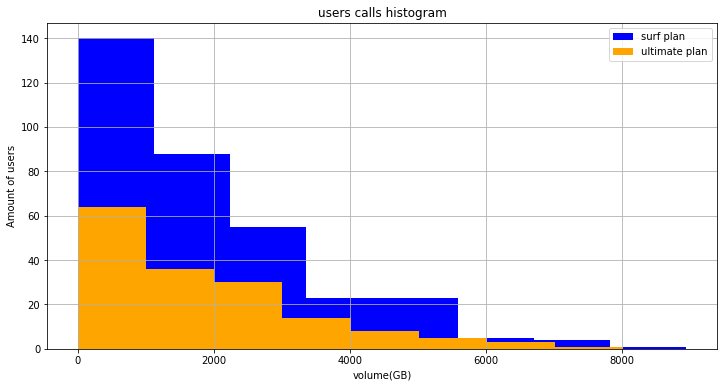

In [8]:
#_______________________Analyze the data_______________________

# a. Create two datasets(one for the in surf plan and the second for ultimate plan) for the next steps
surf_plan_users = megaline_users.loc[megaline_users['plan']=='surf']
ultimate_plan_users = megaline_users.loc[megaline_users['plan']=='ultimate']

# reset index for both datasets:
surf_plan_users.reset_index()
ultimate_plan_users.reset_index()

# b. Check mean, variance, and standard deviation for the minutes, texts, and volume of data the users of each plan

#_________calls:_________
# mean:
surf_calls_mean = surf_plan_users['monthly_calls_duration'].mean()
ultimate_calls_mean = ultimate_plan_users['monthly_calls_duration'].mean()

# variance:
surf_calls_varience = surf_plan_users['monthly_calls_duration'].var()
ultimate_calls_varience = ultimate_plan_users['monthly_calls_duration'].var()

# standard deviation:
surf_calls_sigma = np.sqrt(surf_calls_varience)
ultimate_calls_sigma = np.sqrt(ultimate_calls_varience)


print('______Calls mean,variance, and standard deviation______')
print('\n'+'Users with surf plan:')
print('Mean:',surf_calls_mean,'\n'+'Varience:',surf_calls_varience,'\n'+'standard deviation:',surf_calls_sigma)
print('\n'+'Users with ultimate plan:')
print('Mean:',ultimate_calls_mean,'\n'+'Varience:',ultimate_calls_varience,'\n'+'standard deviation:',ultimate_calls_sigma)

#display histogram: 
ax1 = surf_plan_users['monthly_calls_duration'].hist(figsize=(12,6),bins=8,grid=True,color='blue',label='surf plan')
ax2 = ultimate_plan_users['monthly_calls_duration'].hist(figsize=(12,6),bins=8,grid=True,color='orange',label='ultimate plan')

ax1.set_title('users calls histogram')
ax1.set_xlabel('volume(GB)')
ax1.set_ylabel('Amount of users')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax1.plot()
ax2.plot()


______Messages mean,variance, and standard deviation______

Users with surf plan:
Mean: 144.58407079646017 
Varience: 33340.54542598313 
standard deviation: 182.5939358959742

Users with ultimate plan:
Mean: 167.93167701863354 
Varience: 39411.43905279503 
standard deviation: 198.52314487936926


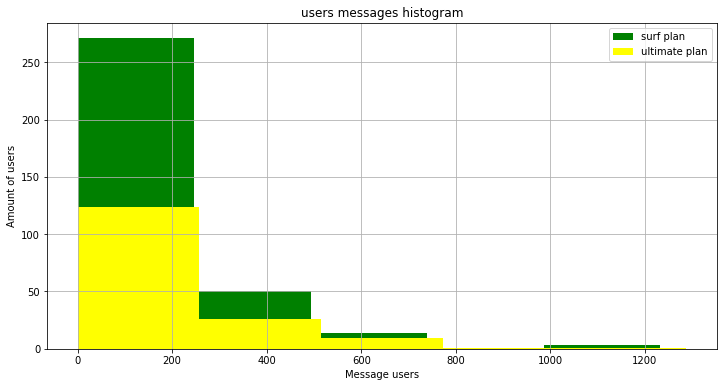

In [9]:
#_________messages:_________
# mean:
surf_messages_mean = surf_plan_users['monthly_messages_number'].mean()
ultimate_messages_mean = ultimate_plan_users['monthly_messages_number'].mean()

# variance:
surf_messages_varience = surf_plan_users['monthly_messages_number'].var()
ultimate_messages_varience = ultimate_plan_users['monthly_messages_number'].var()

# standard deviation:
surf_messages_sigma = np.sqrt(surf_messages_varience)
ultimate_messages_sigma = np.sqrt(ultimate_messages_varience)

print('______Messages mean,variance, and standard deviation______')
print('\n'+'Users with surf plan:')
print('Mean:',surf_messages_mean,'\n'+'Varience:',surf_messages_varience,'\n'+'standard deviation:',surf_messages_sigma)
print('\n'+'Users with ultimate plan:')
print('Mean:',ultimate_messages_mean,'\n'+'Varience:',ultimate_messages_varience,'\n'+'standard deviation:',ultimate_messages_sigma)

#display histogram: 
ax3 = surf_plan_users['monthly_messages_number'].hist(figsize=(12,6),bins=5,grid=True,color='green',label='surf plan')
ax4 = ultimate_plan_users['monthly_messages_number'].hist(figsize=(12,6),bins=5,grid=True,color='yellow',label='ultimate plan')
ax3.set_xlabel('Message users')
ax3.set_ylabel('Amount of users')
ax3.set_title('users messages histogram')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')


______Data volume mean,variance, and standard deviation______

Users with surf plan:
Mean: 77.33628318584071 
Varience: 3619.3599518248934 
standard deviation: 60.16111661052256

Users with ultimate plan:
Mean: 77.47826086956522 
Varience: 4466.563586956521 
standard deviation: 66.8323543424629


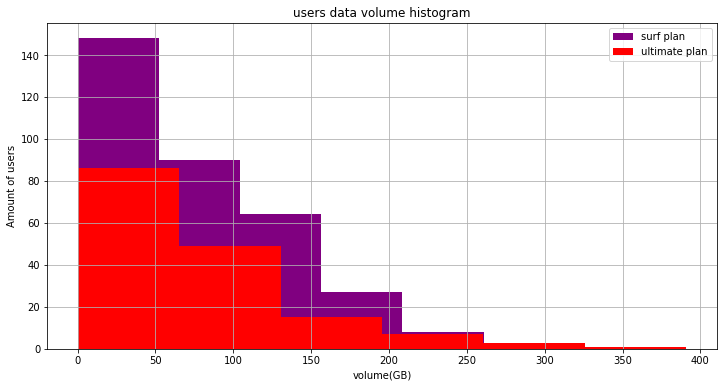

In [10]:
#_________Data volume:_________
# mean:
surf_volume_mean = surf_plan_users['monthly_volume'].mean()
ultimate_volume_mean = ultimate_plan_users['monthly_volume'].mean()

# variance:
surf_volume_varience = surf_plan_users['monthly_volume'].var()
ultimate_volume_varience = ultimate_plan_users['monthly_volume'].var()

# standard deviation:
surf_volume_sigma = np.sqrt(surf_volume_varience)
ultimate_volume_sigma = np.sqrt(ultimate_volume_varience)

print('______Data volume mean,variance, and standard deviation______')
print('\n'+'Users with surf plan:')
print('Mean:',surf_volume_mean,'\n'+'Varience:',surf_volume_varience,'\n'+'standard deviation:',surf_volume_sigma)
print('\n'+'Users with ultimate plan:')
print('Mean:',ultimate_volume_mean,'\n'+'Varience:',ultimate_volume_varience,'\n'+'standard deviation:',ultimate_volume_sigma)

#display histogram: 
ax3 = surf_plan_users['monthly_volume'].hist(figsize=(12,6),bins=6,grid=True,color='purple',label='surf plan')
ax4 = ultimate_plan_users['monthly_volume'].hist(figsize=(12,6),bins=6,grid=True,color='red',label='ultimate plan')

ax3.set_title('users data volume histogram')
ax3.legend(loc='upper right')
ax3.set_xlabel('volume(GB)')
ax3.set_ylabel('Amount of users')
ax4.legend(loc='upper right')


### Conclusions - Part 3

In this chapter we have checked the data of the minutes, texts, and volume of data the users of each plan require per month.

* Calls mean,variance, standard deviation and histogram.

   **Users with surf plan:**
    * Mean: 1878.1452502585441 
    * Varience: 2653038.3498293366 
    * Standard deviation: 1628.8150139992376

   **Users with ultimate plan:**
    * Mean: 1816.5156388608566 
    * Varience: 2592558.9878698504 
    * Standard deviation: 1610.1425365072032
    
    Histogram:
    As we see from the histogram users from ultimate plan use more minutes than the users of surf plan.
    type of distribution(the most close one) - Exponential  


* Messages mean,variance, standard deviation and histogram.
    
   **Users with surf plan:**
    * Mean: 144.58407079646017 
    * Varience: 33340.54542598313 
    * Standard deviation: 182.5939358959742

   **Users with ultimate plan:**
    * Mean: 167.93167701863354 
    * Varience: 39411.43905279503 
    * Standard deviation: 198.52314487936926
    
    Histogram:
    As we see from the histogram users from ultimate plan and from surf plan have similler proprtion in total messages per month.
    type of distribution(the most close one) - Exponential
    
    
* Data volume mean,variance, standard deviation and histogram.
    
   **Users with surf plan:**
    * Mean: 76.83238935791286 
    * Varience: 3619.939857208292 
    * Standard deviation: 60.16593602037861

   **Users with ultimate plan:**
    * Mean: 76.98499272411654 
    * Varience: 4470.028210899034 
    * Standard deviation: 66.85826957751026
    
Histogram:
    As we see from the histogram users from ultimate plan use more GB than the users of surf plan.
    type of distribution(the most close one) - Exponential  


## Part 4 - Test the hypotheses 

In [11]:
# In this part we test 2 hypotses:
# 1. The average revenue from users of Ultimate and Surf calling plans differs.
# 2. The average revenue from users in NY-NJ area is different from that of the users from other regions.

# your code: set a critical statistical significance level for both tests:
alpha = 0.05

#______________________First test:______________________

print('____________TEST1:____________\n')
print('Null hypothesis: The average revenue from users of Ultimate and Surf calling plans are equal.')
print('Alternative hypothesis: The average revenue from users of Ultimate and Surf calling plans differs.')

surf_revenue_mean = surf_plan_users['monthly_revenue'].mean()
ultimate_revenue_mean = ultimate_plan_users['monthly_revenue'].mean()
print('surf users revenue mean:',surf_revenue_mean)
print('ultimate users revenue mean:',ultimate_revenue_mean)

results1 = st.ttest_ind(surf_plan_users['monthly_revenue'], ultimate_plan_users['monthly_revenue'],equal_var=False)
print('p-value of the alternative hypothesis:', results1.pvalue)

if (results1.pvalue<alpha):
    print("We reject the null hypothesis\n")
else:
    print("We can't reject the null hypothesis\n")

#______________________Second test:______________________

print('____________TEST2:____________\n')
print('Null hypothesis: The average revenue from users in NY-NJ area is different from that of the users from other regions.')
print('Alternative hypothesis: The average revenue from users in NY-NJ area is equal from that of the users from other regions.')
    
ny_nj_revenues = megaline_users[megaline_users['city'].str.contains('NY-NJ')]['monthly_revenue']
other_revenues = megaline_users[~megaline_users['city'].str.contains('NY-NJ')]['monthly_revenue']

ny_nj_revenues_mean = ny_nj_revenues.mean()
other_revenues_mean = other_revenues.mean()
print('Users revenue mean in NY-NJ',ny_nj_revenues_mean)
print('Users revenue revenue mean in other cities:',other_revenues_mean)

results2 = st.ttest_ind(ny_nj_revenues, other_revenues, equal_var=False)
print('p-value of the alternative hypothesis:', results2.pvalue)

if (results2.pvalue<alpha):
    print("We reject the null hypothesis\n")
else:
    print("We can't reject the null hypothesis\n")

____________TEST1:____________

Null hypothesis: The average revenue from users of Ultimate and Surf calling plans are equal.
Alternative hypothesis: The average revenue from users of Ultimate and Surf calling plans differs.
surf users revenue mean: 24.314955655765612
ultimate users revenue mean: 70.01788819835794
p-value of the alternative hypothesis: 1.0696725223470859e-280
We reject the null hypothesis

____________TEST2:____________

Null hypothesis: The average revenue from users in NY-NJ area is different from that of the users from other regions.
Alternative hypothesis: The average revenue from users in NY-NJ area is equal from that of the users from other regions.
Users revenue mean in NY-NJ 35.190624939859845
Users revenue revenue mean in other cities: 39.76285707631281
p-value of the alternative hypothesis: 0.07571890672323427
We can't reject the null hypothesis



### Conclusion - Part 4

We have checked the two hypotheses in the following tests(with alpha of 0.05):
* First Test:
  We have checked two hypotheses:
  1. *Null hypothesis* - The average revenue from users of Ultimate and Surf calling plans are equal.
  2. *Alternative hypothesis* - The average revenue from users of Ultimate and Surf calling plans differs.
  
  We have calculated the p-value of the alternate hypothesis and he was smaller than 0.05(alpha) so **we reject the null    hypothesis and accept the alternative hypothesis**.
  
  result - The hypothesis on the equality of two users groups(the first have surf plan and the second have the ultimate plan) is rejected. 
  
  
* Second Test:
  We have checked two hypotheses:
  1. *Null hypothesis* - The average revenue from users in NY-NJ area is equal from that of the users from other regions.
  2. *Alternative hypothesis* - The average revenue from users in NY-NJ area is different from that of the users from other regions.
  
  We have calculated the p-value of the alternate hypothesis and he was bigger than 0.05(alpha) so **we accept the null    hypothesis and reject the alternative hypothesis**. 
  
  result - we reject the hypothesis that the average revenue from users in NY-NJ area is different from that of the users from other regions. 

## Overall Conclusion:

In the project we did those steps:
1. Read the 5 datasets and check their general information.
2. **Prepare the data** - fix columns types and create new columns for bette analysis of our data.
3. **Analyze the data** - check the mean, varience, standard deviation and histogram of the messages, calls and the Data volume. we see from the histogram the that data propertion between the users surf plan and the users ultimate plan are pretty similer.
4. **Test the hypotheses** - we have checked 2 hypotheses, with alpha of 0.05:
    * The average revenue from users of Ultimate and Surf calling plans differs - we rejected this hypotesis because the oposite(alternative) hypotesis had a really small p-value so we accepted the hypothesis of the equality of two users groups(the first have surf plan and the second have the ultimate plan).
    * The average revenue from users in NY-NJ area is different from that of the users from other regions - We accepted this hypotesis because the oposite(alternative) hypotesis had bigger p-value than the alpha we set.
    